# Objective: 

The objective of this notebook is to perform predictions and time series forecasting of COVID-19 spread in US and to predict the next day outcome.

# Data

The data is being taken from the Coronavirus data repository operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE).The data is updated every 24 hours. The link for the confirmed global cases: "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [2]:
from __future__ import absolute_import, division, print_function

import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import os
import io
import pandas as pd
import requests


### Fetching the data 

In [3]:
#Fetching the data 
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
s=requests.get(url).content
data_con=pd.read_csv(io.StringIO(s.decode('utf-8')))
data_con.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,24,24,40,40,74,84,94,110
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,59,64,70,76,89,104,123,146,174,186
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,74,87,90,139,201,230,264,302,367,409
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,53,75,88,113,133,164,188,224,267
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,1,2,2,3,3,3,4,4


### Separating out the confirmed cases for each country and summing them up.

In [4]:
names=data_con['Country/Region'].unique()    
data1=pd.DataFrame([])
i=0
for x in names:
      data=data_con.where(data_con['Country/Region']==x).sum()
      data.loc['Province/State']=x
      data1.loc[0:len(data),i]=data
      i=i+1
df=data1.iloc[3:]
df.columns=data1.iloc[0].T
del df['Nepal']
df=df.astype(float)
lendf=len(df)

In [5]:
df.tail()

Province/State,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Timor-Leste,Belize,Laos,Libya,West Bank and Gaza,Guinea-Bissau,Mali,Saint Kitts and Nevis,Kosovo,Burma
3/23/20,40.0,104.0,230.0,133.0,3.0,3.0,301.0,235.0,1682.0,4474.0,...,1.0,1.0,0.0,0.0,59.0,0.0,0.0,0.0,0.0,0.0
3/24/20,74.0,123.0,264.0,164.0,3.0,3.0,387.0,249.0,2044.0,5283.0,...,1.0,1.0,2.0,1.0,59.0,0.0,0.0,0.0,0.0,0.0
3/25/20,84.0,146.0,302.0,188.0,3.0,3.0,387.0,265.0,2364.0,5588.0,...,1.0,2.0,3.0,1.0,59.0,2.0,2.0,2.0,0.0,0.0
3/26/20,94.0,174.0,367.0,224.0,4.0,7.0,502.0,290.0,2810.0,6909.0,...,1.0,2.0,6.0,1.0,84.0,2.0,4.0,2.0,71.0,0.0
3/27/20,110.0,186.0,409.0,267.0,4.0,7.0,589.0,329.0,3143.0,7657.0,...,1.0,2.0,6.0,1.0,91.0,2.0,11.0,2.0,86.0,8.0


### Removing countries with less than 9000 confirmed cases.

In [6]:
last=len(df.index)-1
list1=[]

# Removing countries with less cases
for col in df.columns:
    if df.iloc[last][col]<9000:
        list1.append(col)

df_cut=df.drop(df[list1], axis=1)


### The graph shows that currently US has largest number of confirmed cases and has the sharpest growing curve among all the countries.

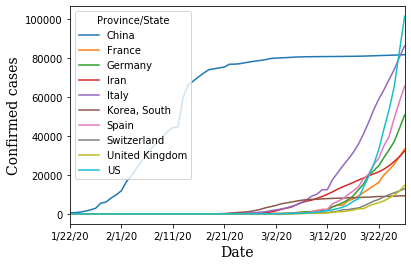

In [7]:
df_cut.plot(y=df_cut.columns)

plt.xlabel('Date',family="serif",  fontsize=14)
plt.ylabel('Confirmed cases',family="serif",  fontsize=14)

plt.show()

### Separating US data 

In [8]:
df_US=pd.DataFrame()
lenc=len(df_cut)
c=np.array(np.arange(0,lenc)).T
df_US["Days"]=c
df_US["US"]=df_cut["US"].values.astype('float')
df_US.tail()

,Days,US
61,61,43847.0
62,62,53740.0
63,63,65778.0
64,64,83836.0
65,65,101657.0


### Plotting the graph for US

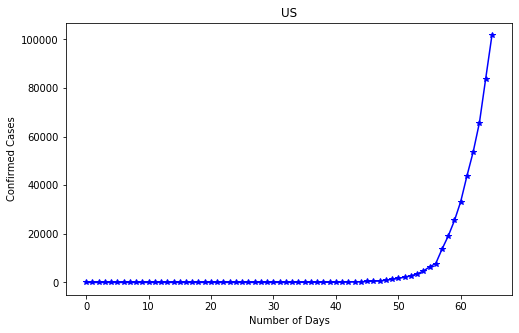

In [9]:
fig = plt.figure(figsize=(8,5))
plt.plot(df_US["Days"],df_US["US"],'b*-')
plt.xlabel('Number of Days')
plt.ylabel('Confirmed Cases')
plt.title('US')
plt.show()

### Storing the last value to be used as test data for the prediction algorithm

In [10]:
y_true=df_US.iloc[lendf-1]['US']
y_true
df_US=df_US.iloc[0:lendf-1]
df_US.tail()

,Days,US
60,60,33276.0
61,61,43847.0
62,62,53740.0
63,63,65778.0
64,64,83836.0


### On analyzing the data, we are fitting exponential model to the data.

In [11]:
import scipy as scipy
from scipy import optimize

In [13]:
X=df_US["Days"]
Y=df_US["US"]
# Define exponential function
def exponential(x, a, b, c):
    #equation=exp(a(1)*(xdata.^2)+a(2)*(xdata) + a(3))
    return np.exp(c+b*x+a*x*x)

popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,X,Y, p0=[0.01,0.001,0.001])
# we then can find the error of the fitting parameters from the pcov_linear array
perr_exponential = np.sqrt(np.diag(pcov_exponential))
print(" Error Variances:",perr_exponential)

 Error Variances: [6.64063551e-04 8.10986881e-02 2.47410483e+00]


### Error Variance for the fitted function:

In [14]:
perr_exponential

array([6.64063551e-04, 8.10986881e-02, 2.47410483e+00])

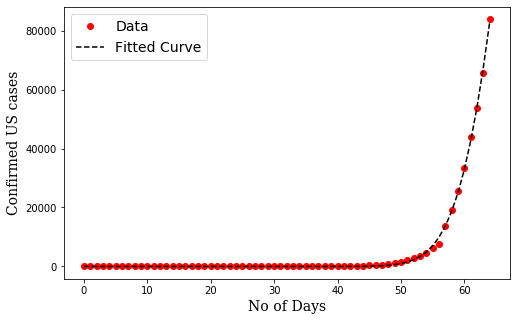

In [15]:
fig = plt.figure(figsize=(8,5))
plt.plot(X, Y, "ro",label='Data')
plt.plot(X, exponential(X, *popt_exponential), 'k--',
         label='Fitted Curve')

plt.xlabel('No of Days',family="serif",  fontsize=14)
plt.ylabel('Confirmed US cases',family="serif",  fontsize=14)
plt.legend(fontsize=14)
plt.show()


### Above figure shows that the fitted exponential curve adequately models the data. The below curve shows the predicted value for the next day.

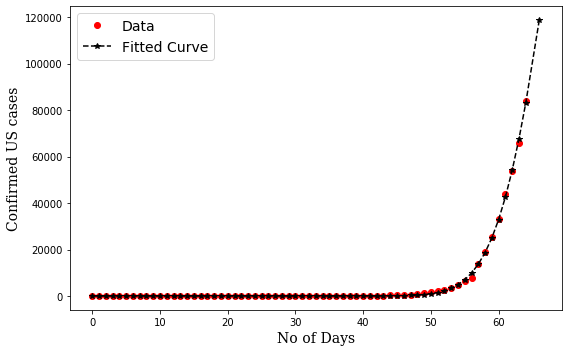

In [16]:
# Testing with one removed entry from above
X_n=np.append(X,np.array([lenc]))
Y_n=exponential(X_n, *popt_exponential)
fig = plt.figure(figsize=(8,5))
plt.plot(X, Y, "ro",label='Data')
plt.plot(X_n, Y_n, 'k--*',
         label='Fitted Curve')

plt.xlabel('No of Days',family="serif",  fontsize=14)
plt.ylabel('Confirmed US cases',family="serif",  fontsize=14)
plt.legend(fontsize=14)

fig.tight_layout()
plt.show()
fig.savefig("fittedExponential.png", format="png",dpi=1000)

### Comparing the true value of confirmed cases with the predicted value

In [17]:
error=y_true-Y_n[len(Y_n)-1]
print("y_true:",y_true)
print("Y_predicted:",Y_n[len(Y_n)-1])

print('Error:',error)


y_true: 101657.0
Y_predicted: 118689.7828119421
Error: -17032.782811942103
